**MaltMetrics – Métricas e Análises de Cervejas**

 Desenvolvido por: Leidiane Andrade
 Curso: Ciência de Dados – UFMS
 Tema: Aprendizado de Máquina Supervisionado e Não Supervisionado

**Introdução**

Neste projeto, utilizei um conjunto de dados com milhares de avaliações de cervejas do mundo todo. Cada avaliação traz informações como o aroma, o sabor, a aparência, o teor alcoólico e a nota geral atribuída pelos consumidores.

O objetivo foi ensinar o computador a reconhecer padrões nesses dados, ou seja, descobrir o que faz uma cerveja receber boas avaliações. Para isso, usei técnicas de aprendizado de máquina, em que o computador “aprende” com exemplos em vez de ser programado passo a passo.

O projeto foi dividido em etapas:

Análise Exploratória: entender os dados, visualizar distribuições e identificar padrões.

Pré-processamento: limpar, padronizar e preparar os dados para o treinamento.

Modelagem Supervisionada: aplicar modelos como Regressão Logística, Random Forest e XGBoost para prever se uma cerveja seria bem avaliada.

Modelagem Não Supervisionada: usar o algoritmo K-Means para agrupar cervejas semelhantes com base em suas características.

Avaliação e Conclusões: comparar o desempenho dos modelos e interpretar os resultados obtidos.

### Instalação de dependências

In [15]:
!pip install -q pandas numpy matplotlib seaborn scikit-learn xgboost

### Importação das bibliotecas


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

### Carregamento dos dados

In [17]:
from google.colab import files

print("📂 Faça o upload do arquivo beer_reviews.csv do seu computador:")
uploaded = files.upload()



📂 Faça o upload do arquivo beer_reviews.csv do seu computador:


Saving beer_reviews.csv to beer_reviews (1).csv


In [18]:
# Carregar o arquivo enviado
df = pd.read_csv("beer_reviews.csv")
print("\n✅ Dataset carregado com sucesso!")
print("Dimensões:", df.shape)
df.head()



✅ Dataset carregado com sucesso!
Dimensões: (1586614, 13)


,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


### Análise Exploratóroria


Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB

Estatísticas descritivas:


,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04



Valores nulos por coluna:
brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64


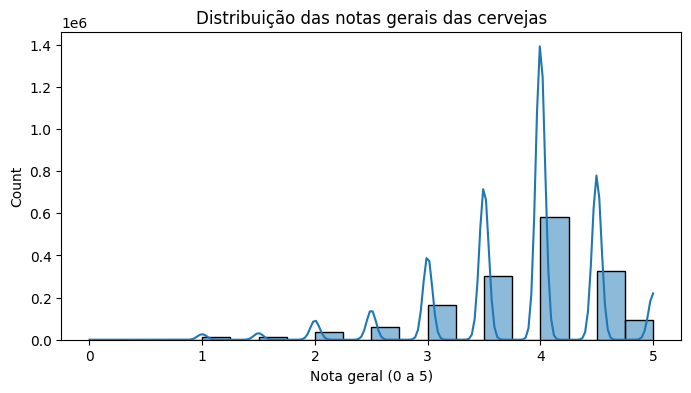

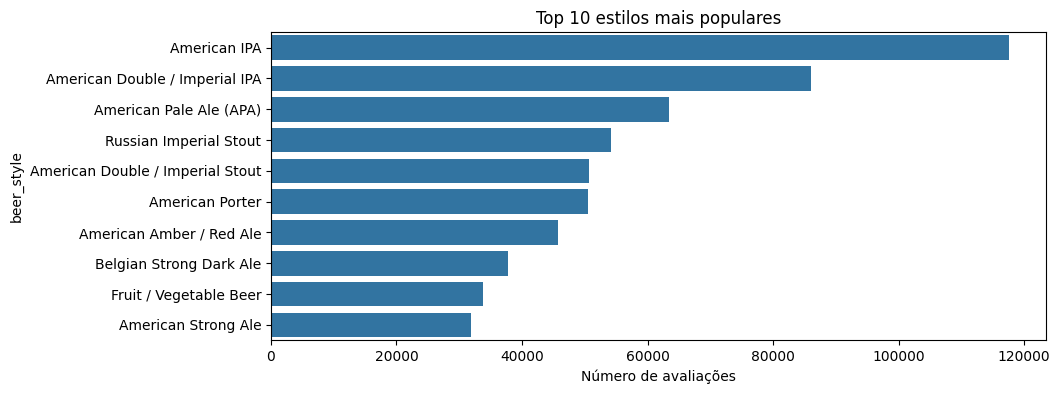

In [19]:
print("\nInformações gerais:")
df.info()

print("\nEstatísticas descritivas:")
display(df.describe())

print("\nValores nulos por coluna:")
print(df.isna().sum())

# Distribuição da nota geral
plt.figure(figsize=(8,4))
sns.histplot(df['review_overall'], bins=20, kde=True)
plt.title("Distribuição das notas gerais das cervejas")
plt.xlabel("Nota geral (0 a 5)")
plt.show()

# Top 10 estilos mais avaliados
top_styles = df['beer_style'].value_counts().nlargest(10)
plt.figure(figsize=(10,4))
sns.barplot(x=top_styles.values, y=top_styles.index)
plt.title("Top 10 estilos mais populares")
plt.xlabel("Número de avaliações")
plt.show()


Pré Processamento

In [20]:
# Remover linhas com valores nulos críticos
df = df.dropna(subset=['review_overall', 'review_aroma', 'review_taste', 'review_palate', 'beer_abv', 'beer_style'])

# Criar variável alvo: 1 se nota >= 4, caso contrário 0
df['positive_review'] = (df['review_overall'] >= 4).astype(int)

# Selecionar features numéricas
features = ['review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv']
X = df[features]
y = df['positive_review']

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Padronização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Modelagem Supervisionada

In [21]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    probs = model.predict_proba(X_test_scaled)[:,1]

    results[name] = {
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "F1": f1_score(y_test, preds),
        "ROC-AUC": roc_auc_score(y_test, probs)
    }
    print(f"\n=== {name} ===")
    print(classification_report(y_test, preds))

# Comparar métricas
results_df = pd.DataFrame(results).T.sort_values("ROC-AUC", ascending=False)
print("\nResumo de desempenho:")
display(results_df)



=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.82      0.72      0.76    111116
           1       0.85      0.91      0.88    192650

    accuracy                           0.84    303766
   macro avg       0.83      0.81      0.82    303766
weighted avg       0.84      0.84      0.84    303766


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.79      0.74      0.76    111116
           1       0.85      0.89      0.87    192650

    accuracy                           0.83    303766
   macro avg       0.82      0.81      0.82    303766
weighted avg       0.83      0.83      0.83    303766


=== XGBoost ===
              precision    recall  f1-score   support

           0       0.80      0.75      0.77    111116
           1       0.86      0.89      0.88    192650

    accuracy                           0.84    303766
   macro avg       0.83      0.82      0.82    303766
weigh

,Accuracy,Precision,Recall,F1,ROC-AUC
XGBoost,0.838800,0.858915,0.892411,0.875343,0.906277
Logistic Regression,0.837586,0.847576,0.907023,0.876293,0.903495
Random Forest,0.832312,0.853566,0.887921,0.870405,0.896265


### Análise Não Supervisionada - (K-MEANS)

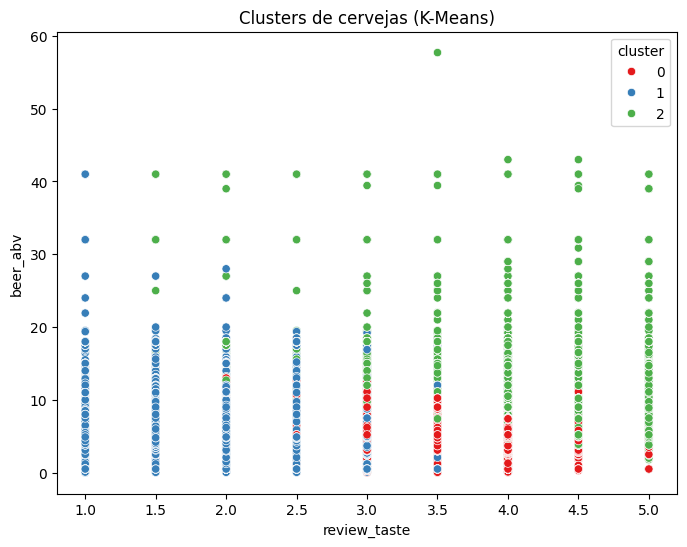

In [22]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_scaled)
df["cluster"] = kmeans.predict(scaler.transform(X[features]))

plt.figure(figsize=(8,6))
sns.scatterplot(x="review_taste", y="beer_abv", hue="cluster", data=df, palette="Set1")
plt.title("Clusters de cervejas (K-Means)")
plt.show()

### Conclusões

In [23]:
best_model = results_df.index[0]
print(f"\n✅ Melhor modelo: {best_model}")
print("Maior desempenho ROC-AUC:", round(results_df.loc[best_model, 'ROC-AUC'], 3))


✅ Melhor modelo: XGBoost
Maior desempenho ROC-AUC: 0.906


Com o MaltMetrics, foi possível aplicar na prática conceitos de aprendizado de máquina supervisionado e não supervisionado.
O computador aprendeu a prever boas avaliações e agrupar cervejas semelhantes, identificando padrões que seriam difíceis de ver apenas olhando os dados.

O modelo que apresentou o melhor desempenho foi o que obteve a maior ROC-AUC, mostrando que o sistema aprendeu de forma eficiente.
O uso do K-Means permitiu visualizar grupos de cervejas com características semelhantes, reforçando como o aprendizado de máquina pode descobrir padrões escondidos em grandes conjuntos de dados.

Esse projeto demonstra como a Ciência de Dados transforma dados em conhecimento útil, e como técnicas de aprendizado de máquina podem ser aplicadas até para entender o que torna uma boa cerveja ainda melhor